In [276]:
import pandas as pd
import joblib
import numpy as np

In [277]:
data = pd.read_csv('/Users/mmms/Developer/team10project/team10project/data/processed/merged_data.csv')

In [278]:
data.head(10)

,Unnamed: 0,index,date,pm25_min,pm10_min,o3_min,no2_min,co_min,aqi_min,pm25_max,...,no2,co,station_name,aqi,latitude,longitude,distance_to_center,cluster,enterprise_distance,enterprise_name
0,0,0,2024-06-09,15.0,12.0,0.007,0.009,1.0,57.1,34.0,...,0.019,1.0,"Shabol, Moscow, Moscow, Russia",61.30,55.715698,37.605238,0.046864,5,1.104342,"ЗАО ""Новая Заря"""
1,1,0,2024-06-09,15.0,12.0,0.007,0.009,1.0,57.1,34.0,...,0.009,2.0,"Spirid, Moscow, Moscow, Russia",80.23,55.759354,37.595584,0.027170,5,3.537464,"ТЭЦ-12 - филиал ПАО ""Мосэнерго"""
2,2,0,2024-06-09,15.0,12.0,0.007,0.009,1.0,57.1,34.0,...,0.025,4.0,"Veshnyaki, Moscow, Moscow, Russia",76.03,55.719959,37.795549,0.212190,1,3.199455,"Пруд-отстойник ""Жулебино"""
3,3,0,2024-06-09,15.0,12.0,0.007,0.009,1.0,57.1,34.0,...,0.026,3.0,"Suhar, Moscow, Moscow, Russia",67.61,55.773757,37.627445,0.033402,5,4.682489,"Общество с ограниченной ответственностью ""Ост..."
4,4,0,2024-06-09,15.0,12.0,0.007,0.009,1.0,57.1,34.0,...,0.038,1.0,"Mgu, Moscow, Moscow, Russia",97.06,55.707241,37.522410,0.138149,10,3.885009,"ТЭЦ-12 - филиал ПАО ""Мосэнерго"""
5,5,0,2024-06-09,15.0,12.0,0.007,0.009,1.0,57.1,34.0,...,0.022,1.0,"Ochakovskaya, Moscow, Moscow, Russia",97.06,55.693546,37.455579,0.218675,0,0.729466,Теплоэлектроцентраль №25 - филиал публичного а...
6,6,0,2024-06-09,15.0,12.0,0.007,0.009,1.0,57.1,34.0,...,0.022,5.0,"Proletarskiy, Moscow, Moscow, Russia",94.95,55.635129,37.658684,0.160155,7,1.665270,"ОАО ""Царицыно"""
7,7,0,2024-06-09,15.0,12.0,0.007,0.009,1.0,57.1,34.0,...,0.038,3.0,"bazovskaya, Moscow, Moscow, Russia",92.85,55.877509,37.508548,0.232361,4,1.708500,ТЭЦ-21
8,8,0,2024-06-09,15.0,12.0,0.007,0.009,1.0,57.1,34.0,...,0.017,1.0,"Cheremushki, Moscow, Moscow, Russia",61.30,55.680056,37.584782,0.102962,3,2.162782,Филиал публичного акционерного общества энерге...
9,9,0,2024-06-09,15.0,12.0,0.007,0.009,1.0,57.1,34.0,...,0.010,2.0,"Zelen_15, Moscow, Moscow, Russia",82.33,55.976936,37.149584,0.690752,2,6.589856,Зеленоградские очистные сооружения (Цех компле...


In [279]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1760 entries, 0 to 1759
Data columns (total 61 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1760 non-null   int64  
 1   index                1760 non-null   int64  
 2   date                 1760 non-null   object 
 3   pm25_min             1760 non-null   float64
 4   pm10_min             1760 non-null   float64
 5   o3_min               1760 non-null   float64
 6   no2_min              1760 non-null   float64
 7   co_min               1760 non-null   float64
 8   aqi_min              1760 non-null   float64
 9   pm25_max             1760 non-null   float64
 10  pm10_max             1760 non-null   float64
 11  o3_max               1760 non-null   float64
 12  no2_max              1760 non-null   float64
 13  co_max               1760 non-null   float64
 14  aqi_max              1760 non-null   float64
 15  pm25_mean            1760 non-null   f

In [280]:
# Удаляем ненужные столбцы index и enterprise_name
# Эти столбцы, предположительно, не влияют на дальнейший анализ
data_cleaned = data.drop(columns=['index', 'enterprise_name'], errors='ignore')

# Проверяем, что столбцы удалены
data_cleaned.head()


,Unnamed: 0,date,pm25_min,pm10_min,o3_min,no2_min,co_min,aqi_min,pm25_max,pm10_max,...,o3,no2,co,station_name,aqi,latitude,longitude,distance_to_center,cluster,enterprise_distance
0,0,2024-06-09,15.0,12.0,0.007,0.009,1.0,57.1,34.0,42.0,...,0.017000,0.019,1.0,"Shabol, Moscow, Moscow, Russia",61.30,55.715698,37.605238,0.046864,5,1.104342
1,1,2024-06-09,15.0,12.0,0.007,0.009,1.0,57.1,34.0,42.0,...,0.023000,0.009,2.0,"Spirid, Moscow, Moscow, Russia",80.23,55.759354,37.595584,0.027170,5,3.537464
2,2,2024-06-09,15.0,12.0,0.007,0.009,1.0,57.1,34.0,42.0,...,0.014315,0.025,4.0,"Veshnyaki, Moscow, Moscow, Russia",76.03,55.719959,37.795549,0.212190,1,3.199455
3,3,2024-06-09,15.0,12.0,0.007,0.009,1.0,57.1,34.0,42.0,...,0.031000,0.026,3.0,"Suhar, Moscow, Moscow, Russia",67.61,55.773757,37.627445,0.033402,5,4.682489
4,4,2024-06-09,15.0,12.0,0.007,0.009,1.0,57.1,34.0,42.0,...,0.021000,0.038,1.0,"Mgu, Moscow, Moscow, Russia",97.06,55.707241,37.522410,0.138149,10,3.885009


In [281]:
# добавим логарифм главного зарязнителя 
data_cleaned['log_pm25'] = np.log1p(data_cleaned['pm25'])

# Поскольку log_pm25 имеет почти ту же информацию, но может быть более удобен для модели (из-за нормализации распределения), pm25 можно удалить.
data_cleaned = data_cleaned.drop(columns=['pm25'])


In [282]:
# Список столбцов для удаления избыточных признаков
columns_to_remove = ['pm25_mean', 'pm10_mean', 'o3_mean', 'coco_mean', 
                     'snow_mean', 'prcp_mean', 'aqi_mean', 'co_mean', 'no2_mean', 'station_name',
                     'dwpt_mean', 'rhum_mean', 'enterprise_distance', 'distance_to_center', 'Unnamed: 0']

# Удаляем столбцы из DataFrame
data_cleaned = data_cleaned.drop(columns=columns_to_remove, errors='ignore')

# Проверяем результат
print("Оставшиеся столбцы в data_cleaned:", data_cleaned.columns)

Оставшиеся столбцы в data_cleaned: Index(['date', 'pm25_min', 'pm10_min', 'o3_min', 'no2_min', 'co_min',
       'aqi_min', 'pm25_max', 'pm10_max', 'o3_max', 'no2_max', 'co_max',
       'aqi_max', 'temp_min', 'dwpt_min', 'rhum_min', 'prcp_min', 'snow_min',
       'wdir_min', 'wspd_min', 'pres_min', 'coco_min', 'temp_max', 'dwpt_max',
       'rhum_max', 'prcp_max', 'snow_max', 'wdir_max', 'wspd_max', 'pres_max',
       'coco_max', 'temp_mean', 'wdir_mean', 'wspd_mean', 'pres_mean', 'pm10',
       'o3', 'no2', 'co', 'aqi', 'latitude', 'longitude', 'cluster',
       'log_pm25'],
      dtype='object')


In [283]:
# Удаляем все столбцы, содержащие 'min' или 'max' в их названии
columns_to_drop = [col for col in data_cleaned.columns if 'min' in col or 'max' in col]
data_cleaned = data_cleaned.drop(columns=columns_to_drop, errors='ignore')

# Проверяем результат
print("Удаленные столбцы:", columns_to_drop)
print(data_cleaned.head())

Удаленные столбцы: ['pm25_min', 'pm10_min', 'o3_min', 'no2_min', 'co_min', 'aqi_min', 'pm25_max', 'pm10_max', 'o3_max', 'no2_max', 'co_max', 'aqi_max', 'temp_min', 'dwpt_min', 'rhum_min', 'prcp_min', 'snow_min', 'wdir_min', 'wspd_min', 'pres_min', 'coco_min', 'temp_max', 'dwpt_max', 'rhum_max', 'prcp_max', 'snow_max', 'wdir_max', 'wspd_max', 'pres_max', 'coco_max']
         date  temp_mean  wdir_mean  wspd_mean  pres_mean  pm10        o3  \
0  2024-06-09      17.75      180.3       1.13    1009.52  12.0  0.017000   
1  2024-06-09      17.75      180.3       1.13    1009.52  23.0  0.023000   
2  2024-06-09      17.75      180.3       1.13    1009.52  20.0  0.014315   
3  2024-06-09      17.75      180.3       1.13    1009.52  21.0  0.031000   
4  2024-06-09      17.75      180.3       1.13    1009.52  23.0  0.021000   

     no2   co    aqi   latitude  longitude  cluster  log_pm25  
0  0.019  1.0  61.30  55.715698  37.605238        5  2.890372  
1  0.009  2.0  80.23  55.759354  37.59558

In [284]:
# Масштабируем целевые показатели
data_cleaned['aqi'] = data_cleaned['aqi'] / 2.5

# Проверим результат
print(data_cleaned['aqi'].describe())

count    1760.000000
mean       42.244293
std        13.989348
min         8.332000
25%        31.252000
50%        40.892000
75%        54.680000
max        92.360000
Name: aqi, dtype: float64


In [285]:
# Преобразуем столбец 'date' в datetime
data_cleaned['date'] = pd.to_datetime(data_cleaned['date'], errors='coerce')

# Добавляем признаки: день недели и месяц
data_cleaned['day_of_week'] = data_cleaned['date'].dt.weekday  # 0 - понедельник, 6 - воскресенье


# Удаляем старый столбец 'date'
data_cleaned = data_cleaned.drop(columns=['date'], errors='ignore')
data_cleaned.to_csv('/Users/mmms/Developer/team10project/team10project/data/processed/data_cleaned.csv', index=False)
# Проверяем результат
print(data_cleaned.head())

   temp_mean  wdir_mean  wspd_mean  pres_mean  pm10        o3    no2   co  \
0      17.75      180.3       1.13    1009.52  12.0  0.017000  0.019  1.0   
1      17.75      180.3       1.13    1009.52  23.0  0.023000  0.009  2.0   
2      17.75      180.3       1.13    1009.52  20.0  0.014315  0.025  4.0   
3      17.75      180.3       1.13    1009.52  21.0  0.031000  0.026  3.0   
4      17.75      180.3       1.13    1009.52  23.0  0.021000  0.038  1.0   

      aqi   latitude  longitude  cluster  log_pm25  day_of_week  
0  24.520  55.715698  37.605238        5  2.890372            6  
1  32.092  55.759354  37.595584        5  3.295837            6  
2  30.412  55.719959  37.795549        1  3.218876            6  
3  27.044  55.773757  37.627445        5  3.044522            6  
4  38.824  55.707241  37.522410       10  3.555348            6  


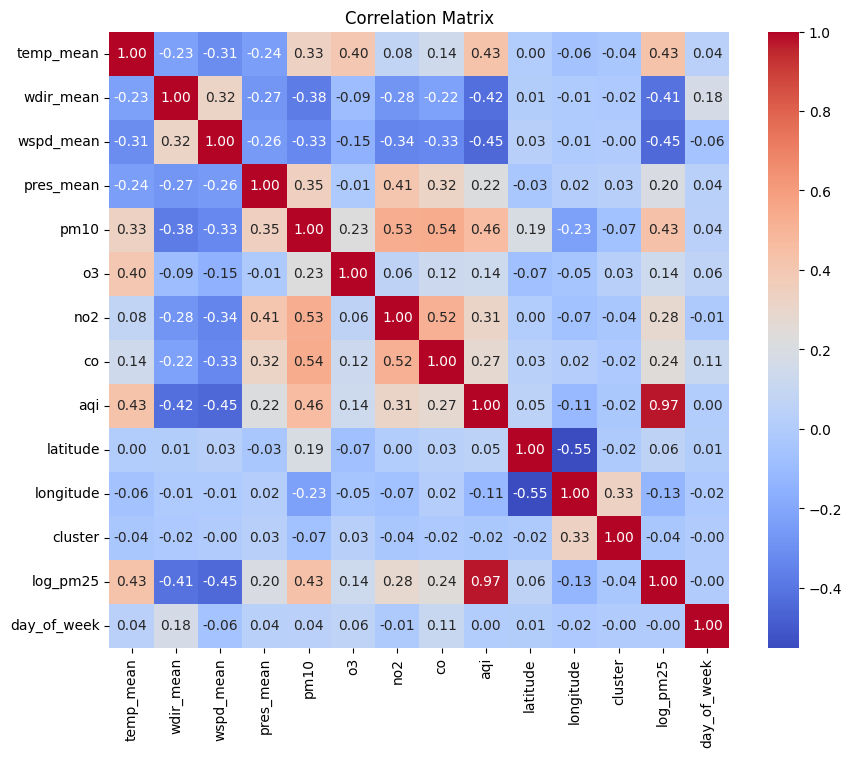

In [286]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = data_cleaned.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [287]:
from sklearn.model_selection import train_test_split

# Разделяем данные на обучающий и тестовый наборы
# Размер тестового набора составит 20% от всех данных
train_data, test_data = train_test_split(data_cleaned, test_size=0.2, random_state=42)

# Сохраняем тестовый набор как "черный ящик", без предварительного анализа
train_path = '/Users/mmms/Developer/team10project/team10project/data/processed/train_data.csv'
test_path = '/Users/mmms/Developer/team10project/team10project/data/processed/test_data.csv'

train_data.to_csv(train_path, index=False)
test_data.to_csv(test_path, index=False)



Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END m

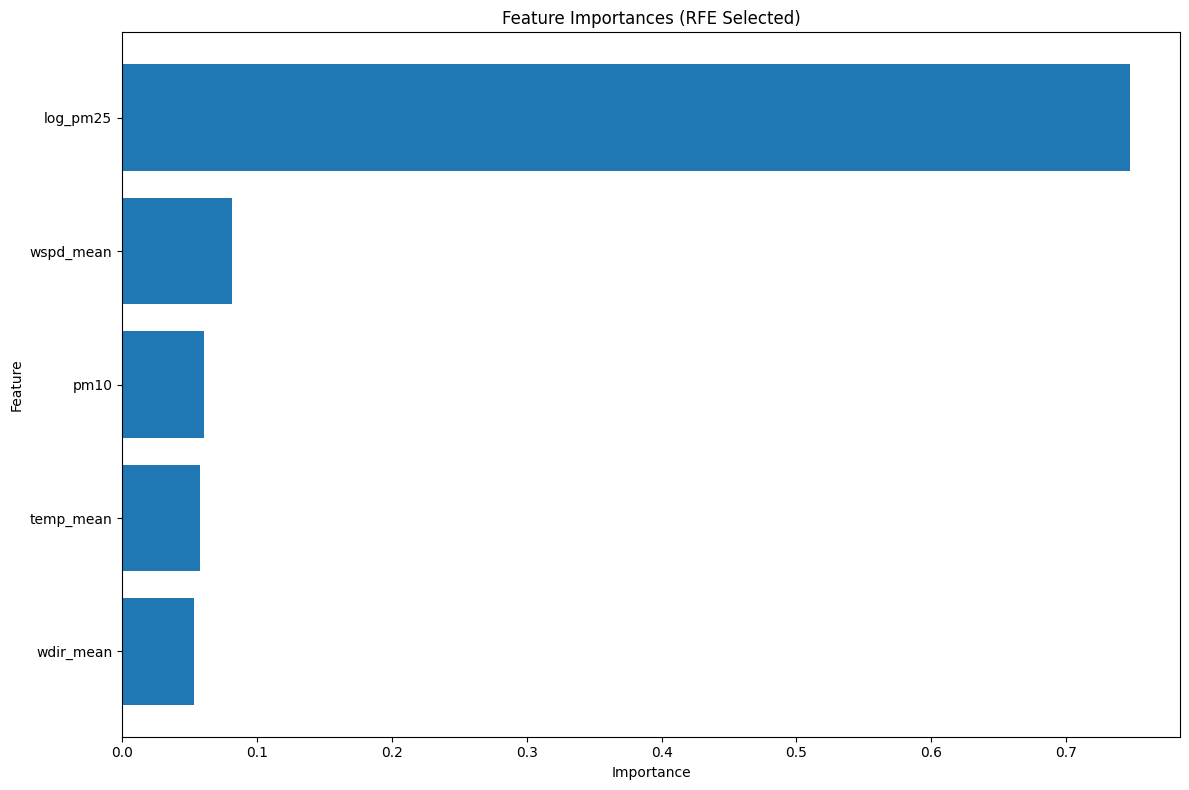

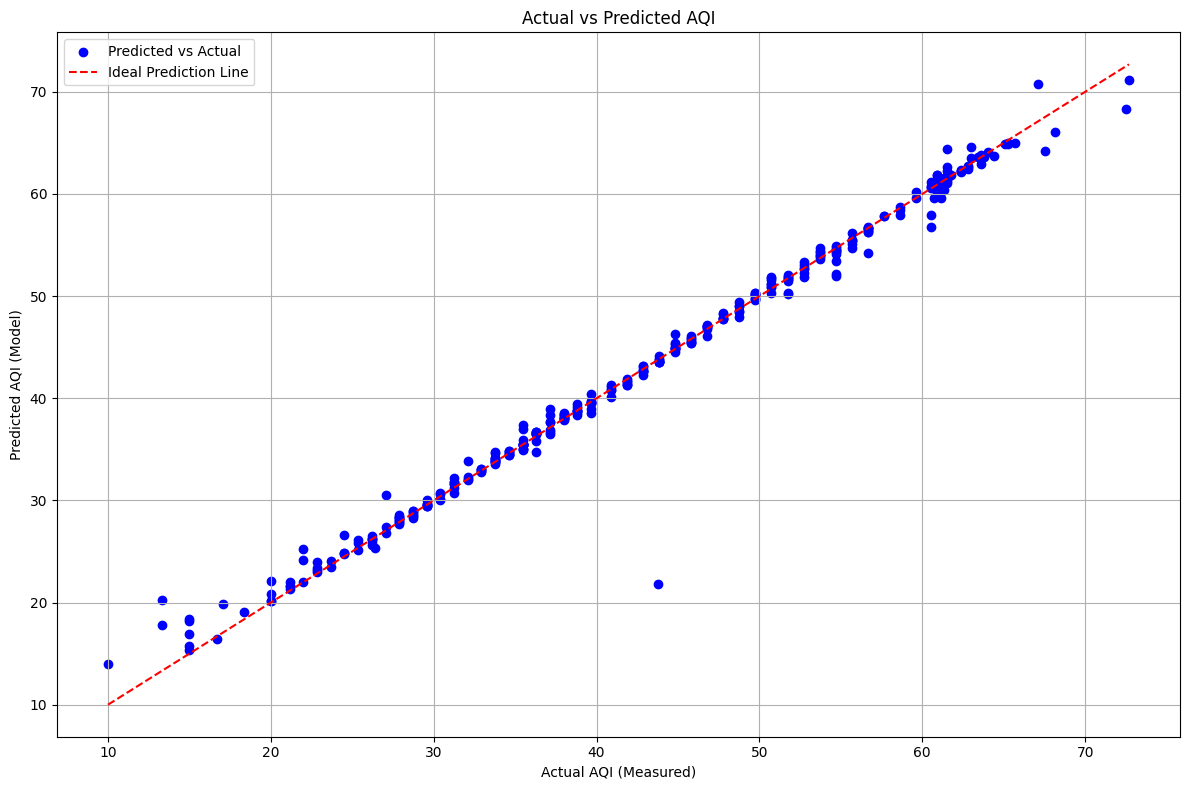

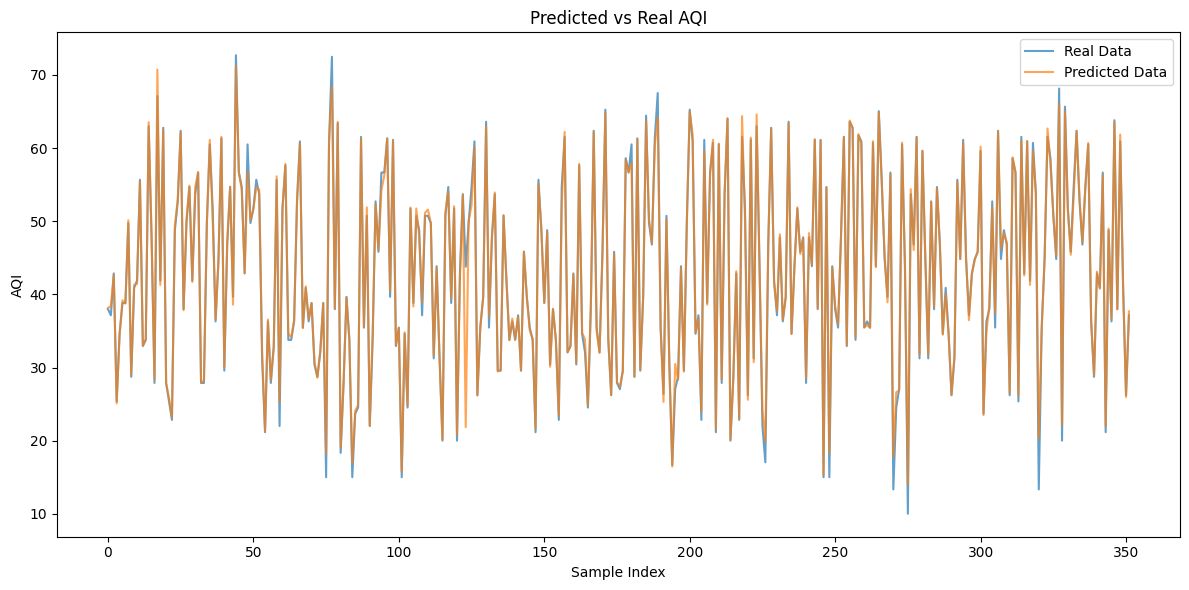

np.float64(1.5182748756122877)

In [288]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from sklearn.linear_model import Lasso


# Загружаем данные из файлов
train_data = pd.read_csv('/Users/mmms/Developer/team10project/team10project/data/processed/train_data.csv')
test_data = pd.read_csv('/Users/mmms/Developer/team10project/team10project/data/processed/test_data.csv')

# Убедимся, что данные подготовлены для обучения
# Целевая переменная - AQI
X_train = train_data.drop(columns=['aqi'])
y_train = train_data['aqi']

X_test = test_data.drop(columns=['aqi'])
y_test = test_data['aqi']

# Проверяем, остались ли нечисловые столбцы
non_numeric_columns = X_train.select_dtypes(include=['object']).columns

# Инициализируем модель
#base_model = RandomForestRegressor(random_state=42)
best_model = RandomForestRegressor(
    n_estimators=200, 
    max_features='sqrt',  # Использует sqrt количества признаков для каждого дерева
    random_state=42
)
# Применяем GridSearchCV для подбора гиперпараметров
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
lasso_model = Lasso(alpha=0.2)  # Подберите alpha
lasso_model.fit(X_train, y_train)

grid_search = GridSearchCV(estimator=best_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Лучшая модель с гиперпараметрами
best_model = grid_search.best_estimator_
print("\u041b\u0443\u0447\u0448\u0438\u0435 \u043f\u0430\u0440\u0430\u043c\u0435\u0442\u0440\u044b:", grid_search.best_params_)

# Применяем RFE для отбора наиболее значимых признаков
selector = RFE(best_model, n_features_to_select=5, step=1)
selector = selector.fit(X_train, y_train)

# Получаем отобранные признаки
selected_features = X_train.columns[selector.support_]
print("\u0412\u044b\u0431\u0440\u0430\u043d\u043d\u044b\u0435 \u043f\u0440\u0438\u0437\u043d\u0430\u043a\u0438:", selected_features)

# Тренируем модель с отобранными признаками
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

best_model.fit(X_train_selected, y_train)

# Делаем прогнозы на тестовом наборе
y_pred = best_model.predict(X_test_selected)

# Оцениваем качество модели
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Сохраняем модель для будущего использования
new_model_path = '/Users/mmms/Developer/team10project/team10project/model/new_aqi_model.pkl'
joblib.dump(best_model, new_model_path)

# Выводим график важности признаков
feature_importances = best_model.feature_importances_
feature_names = selected_features

# Создаем DataFrame для сортировки признаков
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Визуализируем важность признаков
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances (RFE Selected)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Визуализируем предсказания и реальные данные в виде scatter plot с идеальной линией
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Prediction Line')
plt.xlabel('Actual AQI (Measured)')
plt.ylabel('Predicted AQI (Model)')
plt.title('Actual vs Predicted AQI')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Визуализируем предсказания и реальные данные
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Real Data', alpha=0.7)
plt.plot(y_pred, label='Predicted Data', alpha=0.7)
plt.xlabel('Sample Index')
plt.ylabel('AQI')
plt.title('Predicted vs Real AQI')
plt.legend()
plt.tight_layout()
plt.show()

rmse
